In this notebook, I did my initial EDA and focused on looking at information by region and towns.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('full_clean_df.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206915 entries, 0 to 206914
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   town_code       206915 non-null  int64         
 1   naics           206915 non-null  int64         
 2   establishments  206915 non-null  float64       
 3   year            206915 non-null  datetime64[ns]
 4   town_name       206915 non-null  object        
 5   region          206915 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.5+ MB


'We can see at 2020 a dramatic spike that drops just as dramatically for 2021. Note that 2020 is when the pandemic \nstarted. Also interesting to see the overall dip when hurricane Maria hit and the aftermath.'

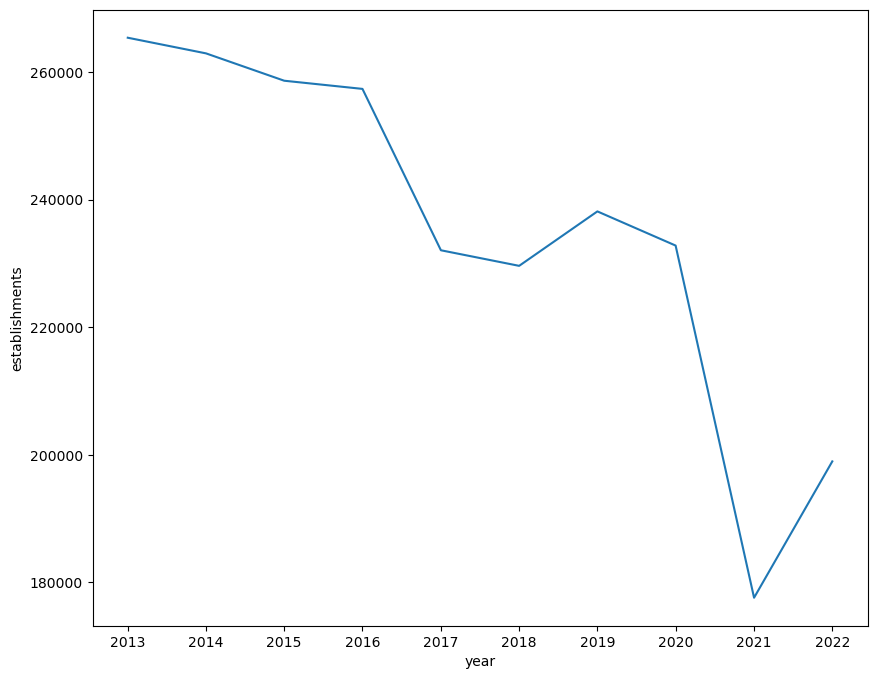

In [4]:
#total establishments over time
plt.figure(figsize=[10,8])
sns.lineplot(data=df, x='year', y='establishments', estimator='sum', errorbar=None)

"""We can see at 2020 a dramatic spike that drops just as dramatically for 2021. Note that 2020 is when the pandemic 
started. Also interesting to see the overall dip when hurricane Maria hit and the aftermath."""

<Axes: xlabel='year', ylabel='establishments'>

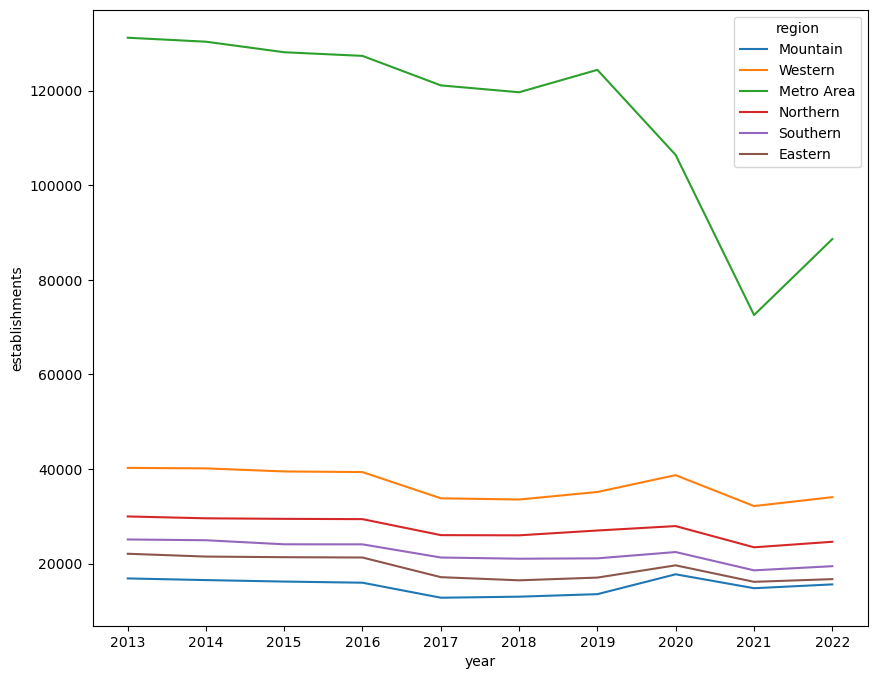

In [54]:
"""When we look at the regions, we see the stark difference betweeen the number of establishments overall in the metro 
vs the rest of the island. Note that the town regions we used were based off of the Puerto Rico tourism boards graphic
they use for promoting the island's regions. Very interesting to see the how the pandemic affected the metro area much more dramatically than the rest of the island, 
the downturn is much more steep than in the other regions"""

#total establishments over time by region
plt.figure(figsize=[10,8])
sns.lineplot(data=df, x='year', y='establishments', hue='region', estimator='sum', errorbar=None)



In [21]:
mountain = df[df['region'] == 'Mountain']

eastern = df[df['region'] == 'Eastern']

metro = df[df['region'] == 'Metro Area']

southern = df[df['region'] == 'Southern']

northern = df[df['region'] == 'Northern']

western = df[df['region'] == 'Western']

In [76]:
sns.set_palette("colorblind")

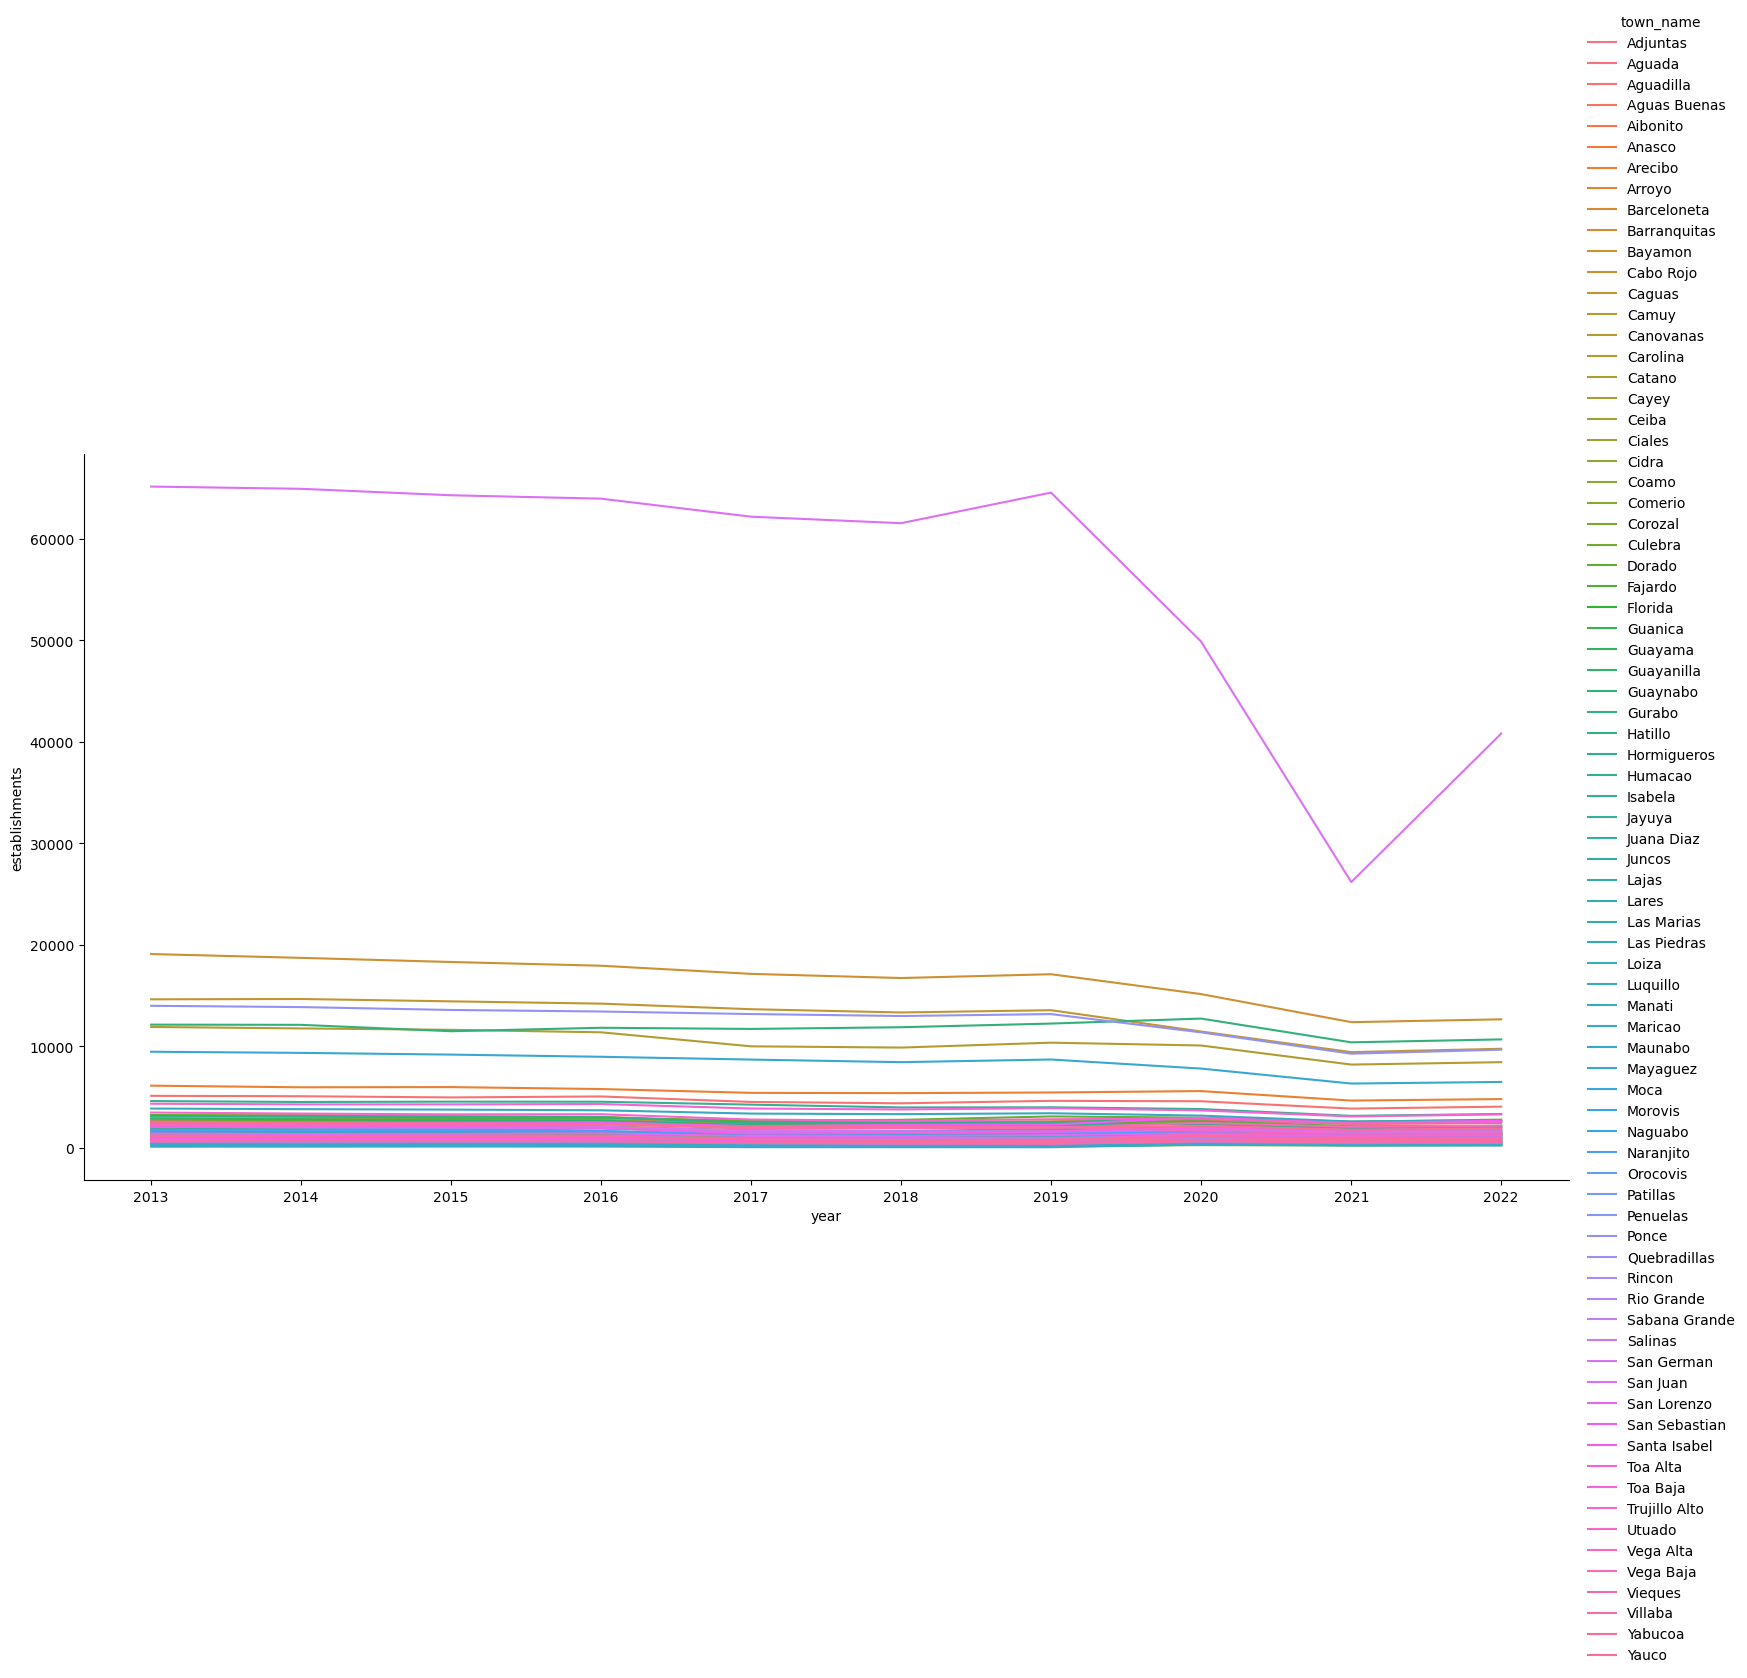

In [77]:
"""The vast mayority of towns have about 5,000 or less establishments per year, with clear outlier like San Juan and the 
rest of the metro area. And by far, San Juan saw the biggest dip in establishments compared to any other town during the 
10 year period."""

sns.relplot(
    data=df, 
    x="year", 
    y="establishments", 
    kind="line", 
    estimator='sum',
    hue="town_name", 
    errorbar=None,
    height=8, #height of each plot in figure in inches
    aspect=2 #aspect ration of width of each plot in figure in inches
)

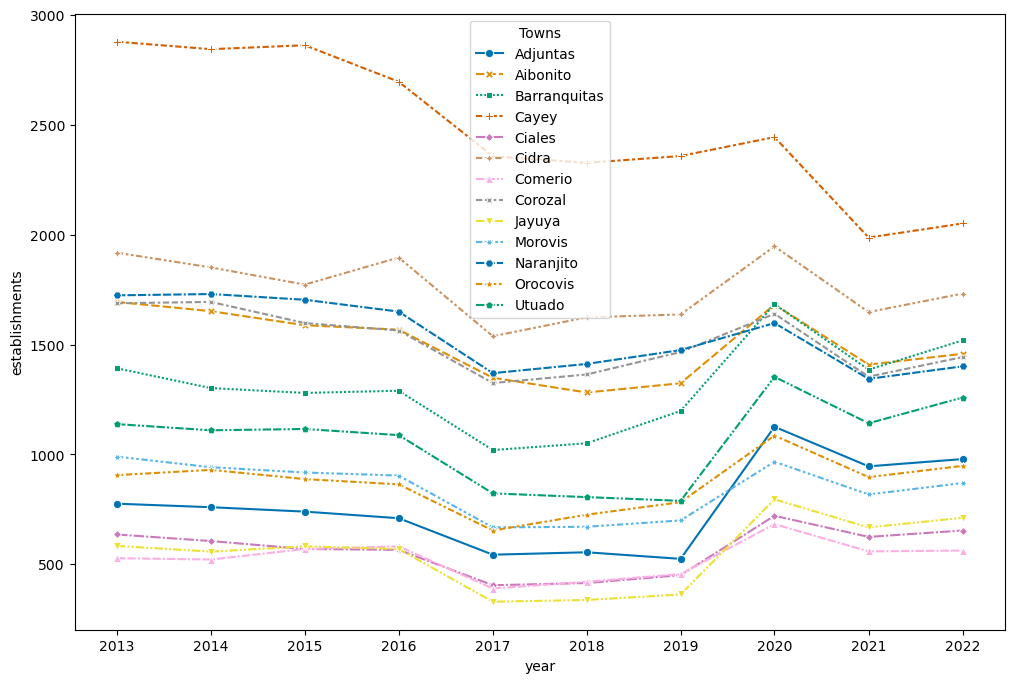

In [93]:
""" Looking at the mountain region, Cayey saw the biggest reduction in establishments over time. all the other towns have a
slight positive trend."""
plt.figure(figsize=[12,8])
sns.lineplot(data=mountain, x="year", y='establishments', style='town_name', hue='town_name', estimator='sum', 
             errorbar=None, markers=True, palette='colorblind')
plt.legend(title='Towns', loc='best')

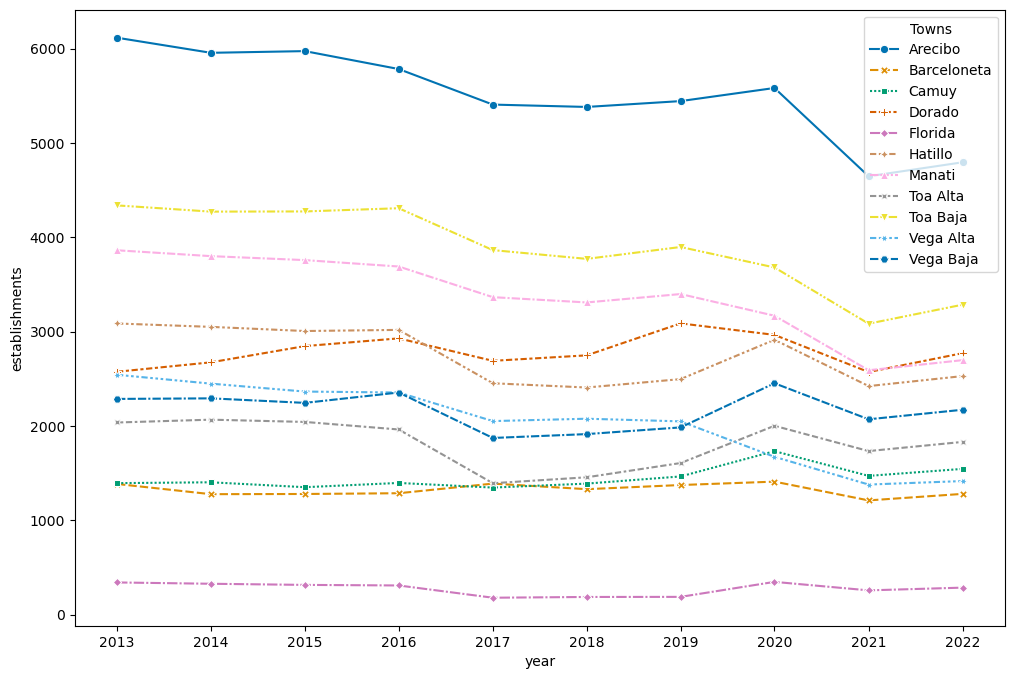

In [94]:
""" Arecibo had the biggest decrease over time, the rest of the towns either maintained or have a slight negative trend.
Camuy saw a slight positive trend."""

plt.figure(figsize=[12,8])
sns.lineplot(data=northern, x="year", y='establishments', style='town_name', hue='town_name', estimator='sum', 
             errorbar=None, markers=True, palette='colorblind')
plt.legend(title='Towns', loc='best')

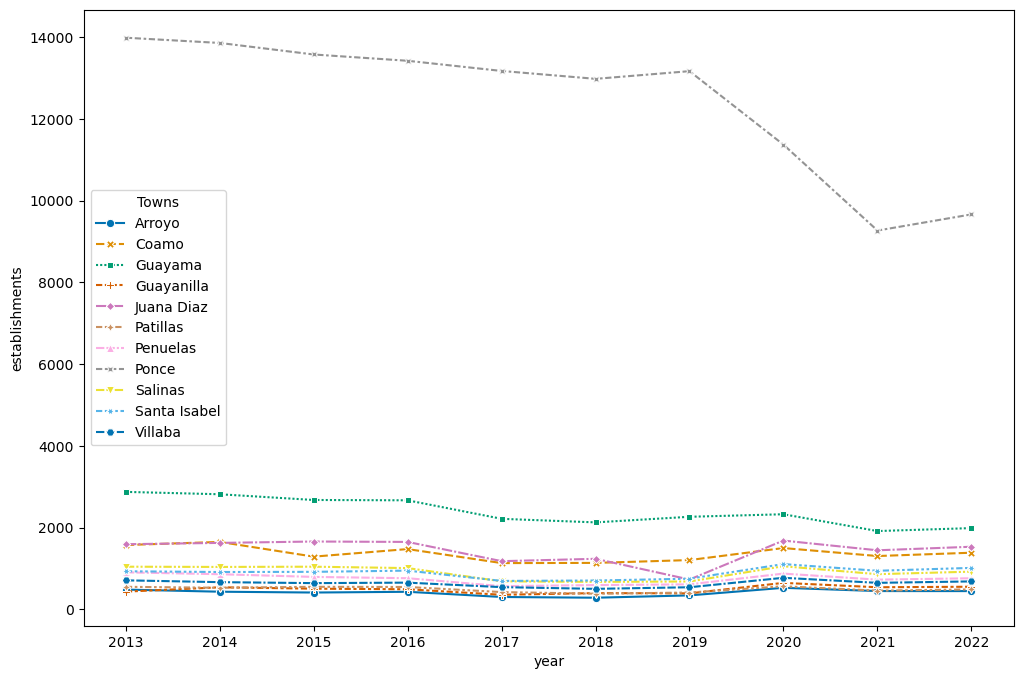

In [95]:
"""Unsurprisingly, Ponce is the town in the south with the highest number of establishments. They are also the town with the
largest negative trend/losses over the 10 year span. Guayama has a slight negative trend while the rest of the towns are
right around where they started the 10 year period."""

plt.figure(figsize=[12,8])
sns.lineplot(data=southern, x="year", y='establishments', style='town_name', hue='town_name', estimator='sum', 
             errorbar=None, markers=True, palette='colorblind')
plt.legend(title='Towns', loc='best')

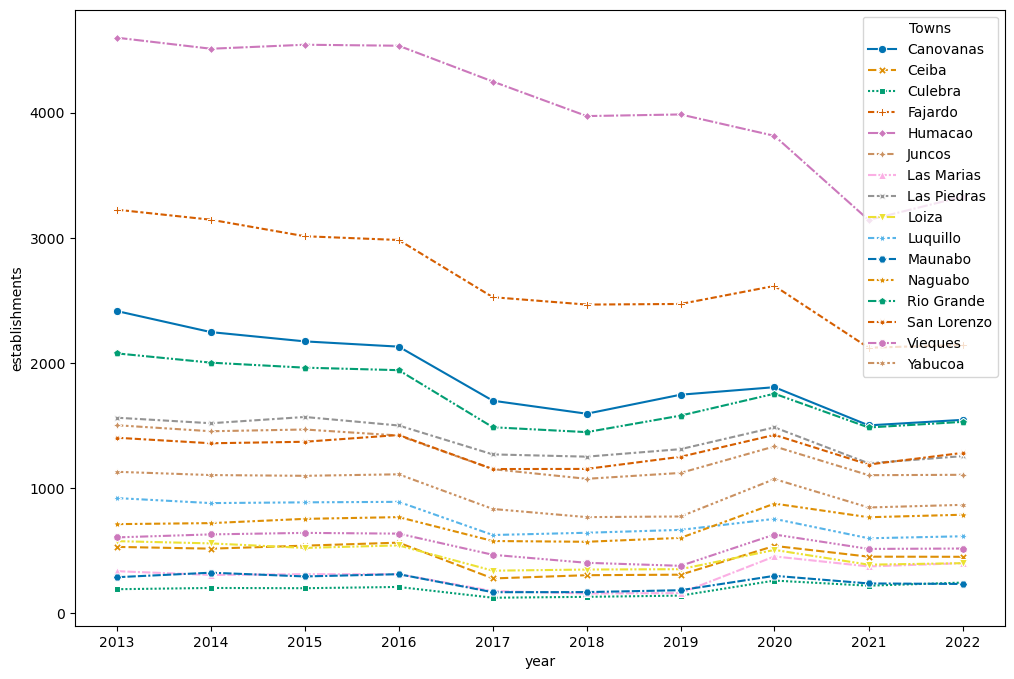

In [96]:
"""All towns in the eastern region either have a negative trend or maintained. """

plt.figure(figsize=[12,8])
sns.lineplot(data=eastern, x="year", y='establishments', style='town_name', hue='town_name', estimator='sum', 
             errorbar=None, markers=True, palette='colorblind')
plt.legend(title='Towns', loc='best')

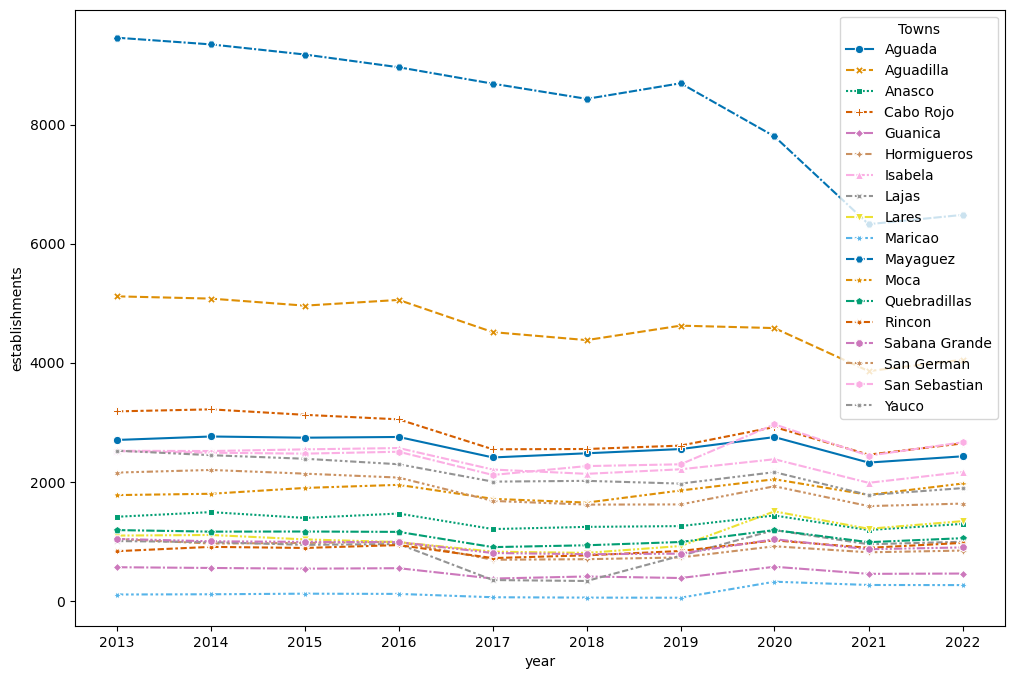

In [97]:
"""Mayaguez and Aguadilla have the highest number of establishments, and once again we see the towns with the highest
concentration of estabishments, experience the biggest decline overtime overall while the rest of the towns in the region
generally remained steady."""

plt.figure(figsize=[12,8])
sns.lineplot(data=western, x="year", y='establishments', style='town_name', hue='town_name', estimator='sum', 
             errorbar=None, markers=True, palette='colorblind')
plt.legend(title='Towns', loc='best')

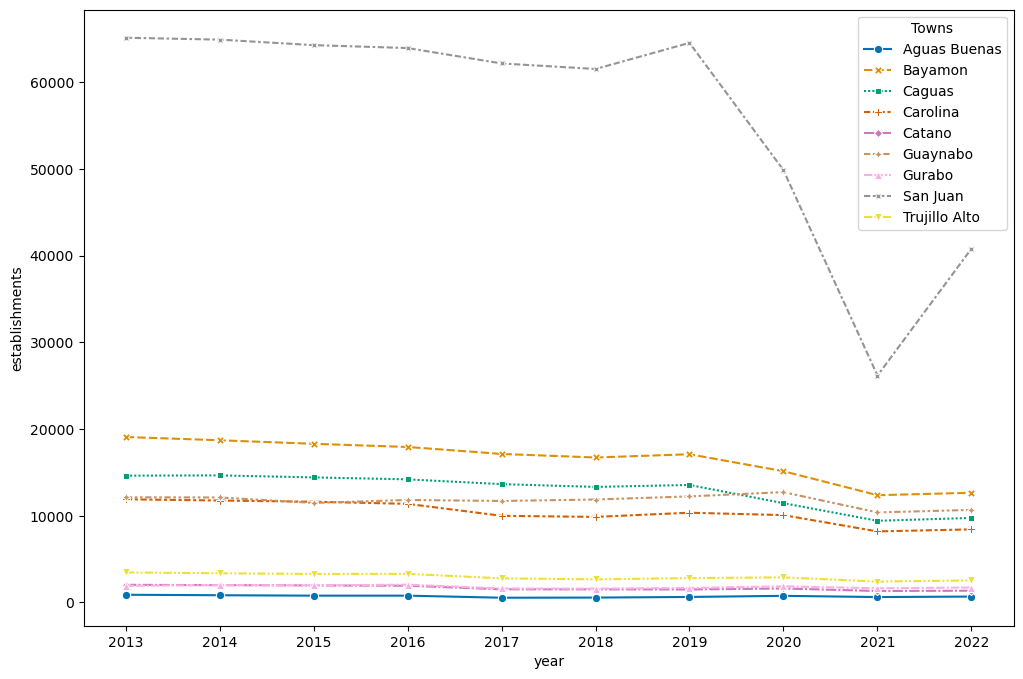

In [98]:
"""San Juan, of all towns in the metro area an across Puerto Rico as a whole, experience the biggest dip in establishments
from 2019 to 2021. Bayamon, Carolina and Caguas experience a slight downward trend over the decade and the rest of the towns
seemed to remain steady. Guaynabo had a slight positive trend"""

plt.figure(figsize=[12,8])
sns.lineplot(data=metro, x="year", y='establishments', style='town_name', hue='town_name', estimator='sum', 
             errorbar=None, markers=True, palette='colorblind')
plt.legend(title='Towns', loc='best')

## Additional thoughts

Consistently, the towns with the highest number of establishments in each region, saw the biggest dip around 2019 to 2021 while having an upwards trend back in 2022. Once 2023 to 2025 data becomes available, it will be interesting to see if they managed to recover to pre pandemic levels.

It's also fascinating to see how the towns with lower establishments, pretty much maintained their numbers across the decade and did not seem negatively affected the same way that the larger towns were. Could there be a relationship between industry and town. I suspect it's possible that there are industries that exist in the larger towns that don't really exist in the smaller ones and these industries are much more susceptible to emergencies like pandemics than others. With my general knowledge of the economy in Puerto Rico, my suspicion is that the establishments that were more likely to close were related to tourism. 